Fitting a model to the augmented data

In [18]:
import numpy as np
import pandas as pd
import sklearn.datasets as skdata
import sklearn.metrics as skmetrics
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

In [10]:
TRAIN_PATH = "reformatted_train.csv"

data = pd.read_csv(TRAIN_PATH)

data_np = data.to_numpy()

print(data_np)

[[738.8546142578125 246329.7402153015 11714.3768138004 ...
  3.0611410234348995 -2.5693580435581387 'Seizure']
 [648.3771362304688 240241.1200637817 12171.878323583564 ...
  -2.342824804504037 0.4739627533553749 'Seizure']
 [769.19580078125 227788.66004180908 6897.6782303575455 ...
  2.622234716289113 -1.0056941785956095 'Seizure']
 ...
 [546.8899536132812 1271.4500059280545 2106.694742316636 ...
  -0.6047417775031619 2.3821534247789025 'GPD']
 [536.5107421875 4249.36002131924 1441.466645578835 ... 1.405599961234897
  -0.8519872328177392 'GPD']
 [970.7913818359376 9242.559974165632 8429.49405913857 ...
  -0.5241702589683626 -2.55045881806235 'GPD']]


In [32]:
x = data_np[:, 0:820]
y = data_np[:, 820]

# Shuffle the dataset based on sample indices
shuffled_indices = np.random.permutation(x.shape[0])

# Choose the first 80% as training set, next 10% as validation and the rest as testing
train_split_idx = int(0.80 * x.shape[0])
val_split_idx = int(0.90 * x.shape[0])

train_indices = shuffled_indices[0:train_split_idx]
val_indices = shuffled_indices[train_split_idx:val_split_idx]
test_indices = shuffled_indices[val_split_idx:]

# Select the examples from x and y to construct our training, validation, testing sets
x_train, y_train = x[train_indices, :], y[train_indices]
x_val, y_val = x[val_indices, :], y[val_indices]
x_test, y_test = x[test_indices, :], y[test_indices]

'''
Trains and tests Perceptron model from scikit-learn
'''
# Create the model
model_scikit = LogisticRegression()

# Train
model_scikit.fit(x_train, y_train)
predictions_train = model_scikit.predict(x_train)
score_train = model_scikit.score(x_train, y_train)
print('Training Accuracy: {:.4f}'.format(score_train))

# Validate
predictions_val = model_scikit.predict(x_val)
score_val = model_scikit.score(x_val, y_val)
print('Validation Accuracy: {:.4f}'.format(score_val))

# Test
predictions_test = model_scikit.predict(x_test)
score_test = model_scikit.score(x_test, y_test)
print('Test Accuracy: {:.4f}'.format(score_test))

Training Accuracy: 0.6795
Validation Accuracy: 0.7083
Test Accuracy: 0.6446


c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Accuracy Score: 0.6446280991735537')

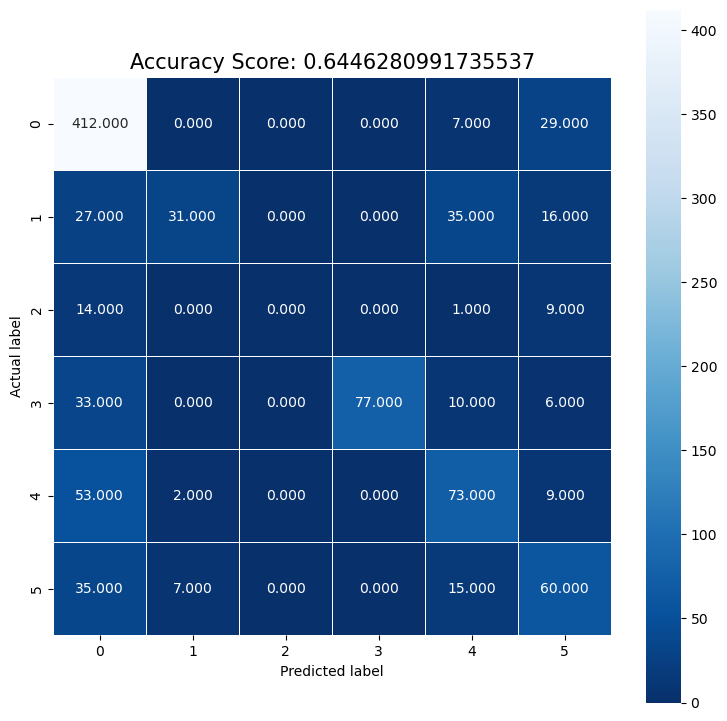

In [34]:
cm = skmetrics.confusion_matrix(y_train, predictions_train)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score_test)
plt.title(all_sample_title, size = 15)